# Interactive code in your book

Sometimes you'd rather let people interact with code *directly on the page*
instead of sending them off to a Binder or a JupyterHub. There are currently
a few ways to make this happen in Jupyter Book (both of which are experimental).

This page describes how to bring interactivity to your book. Both of these
tools use [**MyBinder**](https://mybinder.org) to provide a remote kernel.

## Making your page inputs interactive

✨**experimental**✨

If you'd like to provide interactivity for your content without making your readers
leave the Jupyter Book site, you can use a project called [Thebelab](https://github.com/minrk/thebelab).

This provides you a button that, when clicked, will convert each code cell into
an **interactive** cell that can be edited. It also adds a "run" button to each cell,
and connects to a Binder kernel running in the cloud.
As an alternative to pressing the Thebelab button at the top of the page, you 
can press the <img src="../images/logo/edit-button.svg" alt="" style="width: 20px; display: inline;" /> symbol in the top right corner of each code cell to start the 
interactive mode.

To add a Thebelab button to your Jupyter Book pages, use the following configuration:

```yaml
use_thebelab_button              : true  # If 'true', display a button to allow in-page running code cells with Thebelab
```

In addition, you can configure the Binder settings that are used to provide a kernel for
Thebelab to run the code. These use the same configuration fields as the BinderHub interact
buttons described above.

For an example, click the **Thebelab** button above on this page, and run the code below.

In [3]:
# Imports and call `ion` so that plots will work with one command
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

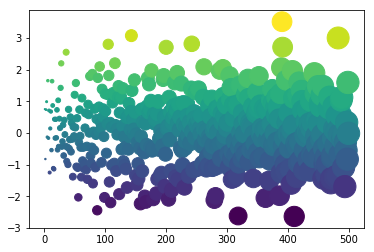

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
x = np.arange(500)
y = np.random.randn(500)

fig, ax = plt.subplots()
ax.scatter(x, y, c=y, s=x)

## Using interactive widgets on your page

✨**experimental**✨

[**nbinteract**](https://www.nbinteract.com) is a tool for displaying interactive widgets in your
static HTML page. It uses a Binder kernel to power the widgets, and displays output that your
readers can interact with. For example, below we will show a simple matplotlib plot that can be made
interactive with **ipywidgets**

To add a **Show Widgets** button to your Jupyter Book pages, use the following configuration:

```yaml
use_show_widgets_button         : true  # If 'true', display a button to show widgets backed by a Binder kernel
```

Then, tell Jupyter Book that you want a cell to display a widget by **adding a tag** to the cell's
metadata called `interactive`. When a reader clicks on the "show widgets" button, any cells
with this tag will be run on Binder, and have their output widgets displayed underneath the cell.

Here's an example of cell metadata that would trigger this behavior:

```json
{
    "tags": [
        "interactive",
    ]
}
```

You can configure the Binder settings that are used to provide a kernel to run the code.
These use the same configuration fields as the BinderHub interact buttons described above.

Clicking on "show widgets" should display a widget below. We've hidden the code cell that
generates the widget by default (though you can always show it by clicking the button to
the right!

In [2]:
from ipywidgets import interact, FloatSlider
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
plt.ion()

x = np.arange(500)
y = np.random.randn(500)

def update_plot_size(s, cmap):
    if cmap == "jet":
        display(HTML("<h2 style='color: red; margin: 0px auto;'>Nope</h2>"))
        return
    fig, ax = plt.subplots()
    ax.scatter(x, y, c=y, s=x*s, cmap=cmap)

interact(update_plot_size, s=FloatSlider(value=1, min=.1, max=2, step=.1), cmap=['viridis', 'magma', 'jet']);

interactive(children=(FloatSlider(value=1.0, description='s', max=2.0, min=0.1), Dropdown(description='cmap', …